In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.datasets import mnist
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
from keras.layers import Input,Dense,Flatten,Conv2D,MaxPooling2D,GlobalAveragePooling2D,BatchNormalization
from keras.models import Model
import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

Using TensorFlow backend.


[]


In [2]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
xtrain1=xtrain.astype('float32')/255.0
xtest1=xtest.astype('float32')/255.0
xtrain1=xtrain1.reshape((len(xtrain1),np.prod(xtrain1.shape[1:])))
xtest1=xtest1.reshape((len(xtest1),np.prod(xtest1.shape[1:])))
print(xtrain1.shape)
print(xtest1.shape)

(60000, 784)
(10000, 784)


In [4]:
encoding_dims=32
input1=Input(shape=(784,))
encod=Dense(encoding_dims,activation='relu')(input1)
decod=Dense(784,activation='sigmoid')(encod)
autoencoder=Model(inputs=input1,outputs=decod)

In [5]:
autoencoder.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_2 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [6]:
# very important we can create small models out of big model to check for internal features etc


encoder=Model(input1,encod)
encoder_input=Input(shape=(encoding_dims,))
decoder_layer=autoencoder.layers[-1]
decoder=Model(encoder_input,decoder_layer(encoder_input))

In [7]:
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [8]:
autoencoder.fit(xtrain1,xtrain1,epochs=50,batch_size=256,shuffle=True,validation_data=(xtest1,xtest1))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 39us/step - loss: 0.2782 - val_loss: 0.1908
Epoch 2/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1716 - val_loss: 0.1542
Epoch 3/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1448 - val_loss: 0.1341
Epoch 4/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1288 - val_loss: 0.1214
Epoch 5/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1184 - val_loss: 0.1132
Epoch 6/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1114 - val_loss: 0.1074
Epoch 7/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1065 - val_loss: 0.1036
Epoch 8/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1029 - val_loss: 0.1002
Epoch 9/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1001 - val_loss: 0.0977
Epoch

In [9]:
encoded_imgs=encoder.predict(xtest1)

In [10]:
decoded_imgs=decoder.predict(encoded_imgs)

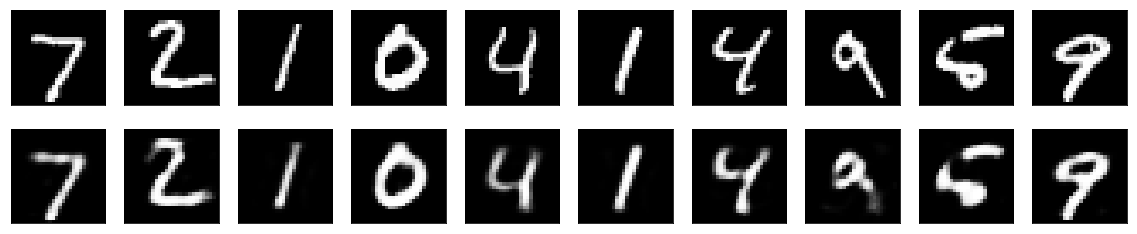

In [11]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(xtest1[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [12]:
# changing encoding dims
encoding_dims=10
input1=Input(shape=(784,))
encod=Dense(encoding_dims,activation='relu')(input1)
decod=Dense(784,activation='sigmoid')(encod)
autoencoder=Model(inputs=input1,outputs=decod)

In [14]:

encoder=Model(input1,encod)
encoder_input=Input(shape=(encoding_dims,))
decoder_layer=autoencoder.layers[-1]
decoder=Model(encoder_input,decoder_layer(encoder_input))
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [15]:
autoencoder.fit(xtrain1,xtrain1,epochs=50,batch_size=256,shuffle=True,validation_data=(xtest1,xtest1))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 25us/step - loss: 0.3296 - val_loss: 0.2378
Epoch 2/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2179 - val_loss: 0.1997
Epoch 3/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1905 - val_loss: 0.1812
Epoch 4/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1779 - val_loss: 0.1729
Epoch 5/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1723 - val_loss: 0.1691
Epoch 6/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1691 - val_loss: 0.1668
Epoch 7/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1669 - val_loss: 0.1647
Epoch 8/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1650 - val_loss: 0.1631
Epoch 9/50
60000/60000 [==============================] - 1s 20us/step - loss: 0.1634 - val_loss: 0.1615
Epoch

In [16]:
encoded_imgs=encoder.predict(xtest1)                       

In [17]:
decoded_imgs=decoder.predict(encoded_imgs)

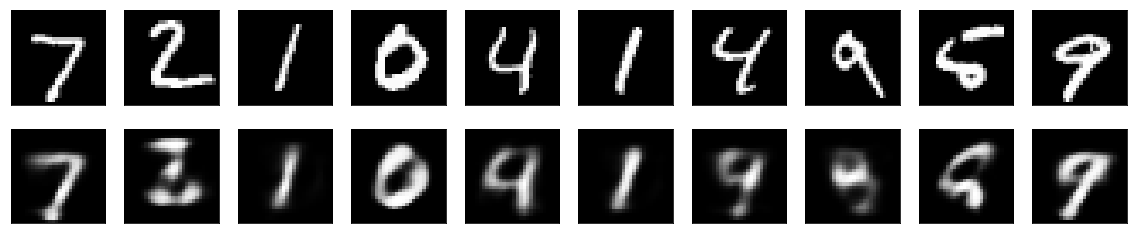

In [18]:
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(xtest1[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [19]:
encoding_dims=5
input1=Input(shape=(784,))
encod=Dense(encoding_dims,activation='relu')(input1)
decod=Dense(784,activation='sigmoid')(encod)
autoencoder=Model(inputs=input1,outputs=decod)

In [20]:

encoder=Model(input1,encod)
encoder_input=Input(shape=(encoding_dims,))
decoder_layer=autoencoder.layers[-1]
decoder=Model(encoder_input,decoder_layer(encoder_input))
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [21]:
autoencoder.fit(xtrain1,xtrain1,epochs=50,batch_size=256,shuffle=True,validation_data=(xtest1,xtest1))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 2s 27us/step - loss: 0.3518 - val_loss: 0.2693
Epoch 2/50
60000/60000 [==============================] - 1s 22us/step - loss: 0.2521 - val_loss: 0.2330
Epoch 3/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2255 - val_loss: 0.2173
Epoch 4/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2148 - val_loss: 0.2100
Epoch 5/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2095 - val_loss: 0.2061
Epoch 6/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2058 - val_loss: 0.2027
Epoch 7/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2025 - val_loss: 0.2001
Epoch 8/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.2001 - val_loss: 0.1980
Epoch 9/50
60000/60000 [==============================] - 1s 21us/step - loss: 0.1984 - val_loss: 0.1964
Epoch

In [ ]:
encoded_imgs=encoder.predict(xtest1)  
decoded_imgs=decoder.predict(encoded_imgs)
import matplotlib.pyplot as plt
n=10
plt.figure(figsize=(20,4))
for i in range(n):
    ax=plt.subplot(2,n,i+1)
    plt.imshow(xtest1[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    ax=plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()
